**K-Nearest** **Neighbour**


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv('KNN.csv')
print(df)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [28]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [29]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [31]:
print(x)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [32]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
print(x)

[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]
 [-1.01769239 -0.34481683]
 [-1.01769239  0.41866944]
 [-0.54012675  2.35674998]
 [-1.20871865 -1.07893824]
 [-0.25358736 -0.13926283]
 [-1.11320552  0.30121002]
 [-1.11320552 -0.52100597]
 [-1.6862843   0.47739916]
 [-0.54012675 -1.51941109]
 [-1.87731056  0.35993973]
 [-0.82666613  0.30121002]
 [ 0.89257019 -1.3138571 ]
 [ 0.70154394 -1.28449224]
 [ 0.79705706 -1.22576253]
 [ 0.98808332 -1.19639767]
 [ 0.70154394 -1.40195167]
 [ 0.89257019 -0.60910054]
 [ 0.98808332 -0.84401939]
 [ 0.70154394 -1.40195167]
 [ 0.79705706 -1.37258681]
 [ 0.89257019 -1.46068138]
 [ 1.08359645 -1.22576253]
 [ 0.89257019 -1.16703281]
 [-0.82666613 -0.78528968]
 [-0.63563988 -1.51941109]
 [-0.63563988  0.12502088]
 [-1.01769239  1.97500684]
 [-1.59077117 -1.5781408 ]
 [-0.92217926 -0.75592482]
 [-1.01769239  0.59485858]
 [-0.25358736 -1.25512738]
 [-0.44461362 -1.22576253]
 

In [34]:
x1=sc.inverse_transform(x)
np.set_printoptions(suppress=True)
print(x1)

[[    19.  19000.]
 [    35.  20000.]
 [    26.  43000.]
 [    27.  57000.]
 [    19.  76000.]
 [    27.  58000.]
 [    27.  84000.]
 [    32. 150000.]
 [    25.  33000.]
 [    35.  65000.]
 [    26.  80000.]
 [    26.  52000.]
 [    20.  86000.]
 [    32.  18000.]
 [    18.  82000.]
 [    29.  80000.]
 [    47.  25000.]
 [    45.  26000.]
 [    46.  28000.]
 [    48.  29000.]
 [    45.  22000.]
 [    47.  49000.]
 [    48.  41000.]
 [    45.  22000.]
 [    46.  23000.]
 [    47.  20000.]
 [    49.  28000.]
 [    47.  30000.]
 [    29.  43000.]
 [    31.  18000.]
 [    31.  74000.]
 [    27. 137000.]
 [    21.  16000.]
 [    28.  44000.]
 [    27.  90000.]
 [    35.  27000.]
 [    33.  28000.]
 [    30.  49000.]
 [    26.  72000.]
 [    27.  31000.]
 [    27.  17000.]
 [    33.  51000.]
 [    35. 108000.]
 [    30.  15000.]
 [    28.  84000.]
 [    23.  20000.]
 [    25.  79000.]
 [    27.  54000.]
 [    30. 135000.]
 [    31.  89000.]
 [    24.  32000.]
 [    18.  44000.]
 [    29.  8

In [35]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te=train_test_split(x, y, test_size=0.2, random_state=0)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
classifier.fit(x_tr, y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [37]:
y_pred=classifier.predict(x_te)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
ac=accuracy_score(y_te, y_pred)
cm=confusion_matrix(y_te, y_pred)

In [41]:
print(ac)

0.95


In [42]:
print(cm)

[[55  3]
 [ 1 21]]


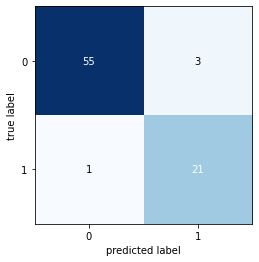

In [43]:
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions
plot_confusion_matrix(cm)
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


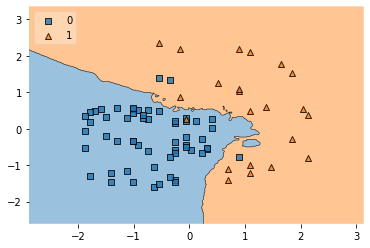

In [44]:
plot_decision_regions(X=x_te, y=y_te, clf=classifier, legend=2)
plt.show()